In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.getcwd()
!mkdir MyDrive   # make a directory called MyDrive, otherwise sometimes "My Drive" causes problem!!

mkdir: cannot create directory ‘MyDrive’: File exists


In [ ]:
!mount --bind /content/drive/My\ Drive /content/MyDrive

In [ ]:
os.chdir("/content/MyDrive/AI_VAR/LAB2/")

In [12]:
!pwd

/content/MyDrive/AI_VAR/LAB2


In [ ]:
pip install keras

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import timeit
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt
from keras import callbacks 

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
def baseline_model(num_pixels, num_classes):

    #Application 1 - Step 5 - Initialize the sequential model
    model = Sequential()

    #TODO - Application 1 - Step 5 - build a standard feed-forward network with one dense hidden layer(with 8 neurons) and one dense output layer
    model.add(Dense(8, input_dim=num_pixels, kernel_initializer='normal', 
    activation='relu')) 
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) 

    #TODO - Application 1 - Step 6 - Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse']) 

    return model

In [ ]:
def trainAndPredictMLP(X_train, Y_train, X_test, Y_test):

    #TODO - Application 1 - Step 2 - Transform the images to 1D vectors of floats (28x28 pixels  to  784 elements)
    num_pixels = X_train.shape[1] * X_train.shape[2] 
    X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32') 
    X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

    #TODO - Application 1 - Step 3 - Normalize the input values
    X_train = X_train / 255 
    X_test = X_test / 255 

    #TODO - Application 1 - Step 4 - Transform the classes labels into a binary matrix
    Y_train = np_utils.to_categorical(Y_train) 
    Y_test = np_utils.to_categorical(Y_test) 
    num_classes = Y_test.shape[1]

    #Application 1 - Step 5 - Call the baseline_model function
    model = baseline_model(num_pixels, num_classes)

    # call early stopping
    earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 

    start = timeit.timeit()
    #TODO - Application 1 - Step 7 - Train the model
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=512, verbose=2, callbacks =[earlystopping]) 
    end = timeit.timeit()
    

    #model save
    model.save_weights('my_model_weights.h5')

    # plot metrics
    plt.plot(history.history['mse'])
    plt.show()

    #TODO - Application 1 - Step 8 - System evaluation - compute and display the prediction error
    scores = model.evaluate(X_test, Y_test, verbose=0) 
    print("Baseline Error: {:.2f}".format(100-scores[1]*100)) 
    print("Covergence time: ", round(end-start, 5))

In [ ]:
def main():
  trainAndPredictMLP(X_train, Y_train, X_test, Y_test)

  return

Epoch 1/10
118/118 - 0s - loss: 1.7276 - mse: 0.0731 - val_loss: 1.0288 - val_mse: 0.0475
Epoch 2/10
118/118 - 0s - loss: 0.7443 - mse: 0.0340 - val_loss: 0.5387 - val_mse: 0.0239
Epoch 3/10
118/118 - 0s - loss: 0.4854 - mse: 0.0217 - val_loss: 0.4163 - val_mse: 0.0182
Epoch 4/10
118/118 - 0s - loss: 0.4046 - mse: 0.0179 - val_loss: 0.3668 - val_mse: 0.0160
Epoch 5/10
118/118 - 0s - loss: 0.3670 - mse: 0.0161 - val_loss: 0.3412 - val_mse: 0.0148
Epoch 6/10
118/118 - 0s - loss: 0.3447 - mse: 0.0151 - val_loss: 0.3251 - val_mse: 0.0141
Epoch 7/10
118/118 - 0s - loss: 0.3302 - mse: 0.0144 - val_loss: 0.3169 - val_mse: 0.0137
Epoch 8/10
118/118 - 0s - loss: 0.3204 - mse: 0.0140 - val_loss: 0.3082 - val_mse: 0.0133
Epoch 9/10
118/118 - 0s - loss: 0.3124 - mse: 0.0136 - val_loss: 0.3052 - val_mse: 0.0131
Epoch 10/10
118/118 - 0s - loss: 0.3061 - mse: 0.0133 - val_loss: 0.3009 - val_mse: 0.0129


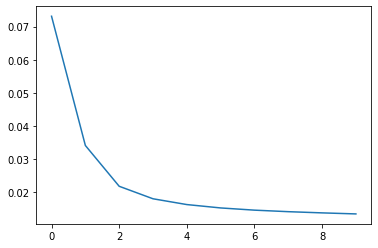

Baseline Error: 98.71
Covergence time:  0.00208


In [ ]:
if __name__ == '__main__':
    main()